### purpose

validate multivarait sims from GF trained with nuisance envs

### notes

code inspired from `02_analysis/05_multivariate_sims/03_validate_gradient_forests.ipynb` which follows MVP_03.py

In [1]:
from pythonimports import *
from myfigs import histo_box

import MVP_03_validate_gradient_forests as mvp03
import MVP_15_climate_outlier_validate_GF as mvp15
import MVP_summary_functions as mvp

import seaborn as sns
from matplotlib.lines import Line2D
plt.rcParams.update({'font.family' : 'serif'})

t0 = dt.now()  # notebook timer

original_tutorial_dir = '/home/b.lind/offsets/run_20220919_tutorial'
tutorial_dir = '/home/b.lind/offsets/run_20220919_nuisance/tutorial'
validation_dir = makedir(f'{tutorial_dir}/gradient_forests/validation')
fig_dir = makedir(f'{validation_dir}/figs')

mvp.latest_commit()
session_info.show()

#########################################################
Today:	June 24, 2023 - 14:49:11 EDT
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit eb8d204ff9a40e48b07c184bcc4ff8621804cde6  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Thu Jun 15 14:34:48 2023 -0400

Current commit of MVP_offsets:
commit dcaf4a98ad33a59e3d371eed0bb26b1885505dcf  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Sat Jun 24 12:25:29 2023 -0400
#########################################################



In [2]:
validation_dir

'/home/b.lind/offsets/run_20220919_nuisance/tutorial/gradient_forests/validation'

# get popdata

In [3]:
inds = pd.read_table(f'{original_tutorial_dir}/tutorial/My_Individuals.txt')

inds.head()

,ind_index,x,y,phenotype1_mat,phenotype2_MTWetQ,phenotype3_MTDQ,phenotype4_PDM,phenotype5_PwarmQ,phenotype6_PWM,env1_mat,env2_MTWetQ,env3_MTDQ,env4_PDM,env5_PwarmQ,env6_PWM,subpopID,lon,lat
0,33,0.406184,0.233272,0.737967,-0.191421,0.142992,-0.131894,-0.452497,-0.541651,0.762432,-0.162238,0.261281,-0.332078,-0.471502,-0.477821,25,5.0,3.0
1,34,0.425697,0.837158,-0.274081,-0.428332,-0.012880,0.221058,0.229296,0.066597,-0.339330,-0.407667,-0.058296,0.288030,0.198810,0.017680,85,5.0,9.0
2,44,0.671673,0.581744,-0.676326,0.086629,-0.470671,0.218813,0.260098,-0.103465,-0.567733,0.090928,-0.414353,0.234899,0.230255,-0.053511,57,7.0,6.0
3,45,0.017466,0.329922,-0.283221,-0.403942,-0.333718,-0.200554,-0.345915,-0.410001,-0.245860,-0.200759,-0.267455,-0.265260,-0.389828,-0.458979,31,1.0,4.0
4,46,0.069744,0.121221,0.057616,-0.303201,0.731600,0.195679,-0.367110,0.196296,-0.121500,-0.306379,0.702858,0.211275,-0.352307,0.212751,11,1.0,2.0


In [4]:
locations = inds.groupby('subpopID')[['lon', 'lat']].apply(np.mean)

locations

,lon,lat
subpopID,,
1,1.0,1.0
2,2.0,1.0
3,3.0,1.0
4,4.0,1.0
5,5.0,1.0
...,...,...
96,6.0,10.0
97,7.0,10.0
98,8.0,10.0


# get fitness

In [6]:
mvp15.fitness_dir = f'{original_tutorial_dir}/tutorial/fitness_mats'
fitness = mvp15.get_fitness(
    ['tutorial'],
)['tutorial']

fitness.index = fitness.index.astype(int)

fitness = fitness.loc[sorted(fitness.index)]

fitness


Reading fitness matrices ...


100%|███████████████| 1/1 [00:00<00:00,  2.73it/s]


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,0.982222,0.924615,0.612,0.431,0.500000,0.660000,0.894444,0.878889,0.752667,0.731,0.862857,0.738889,0.49375,0.41500,0.568889,0.790833,0.809091,0.722,0.598182,0.608182,0.6625,0.598333,0.502857,0.422308,0.659167,0.781667,0.77250,0.618889,0.559231,0.532727,0.45625,0.472143,0.438,0.535556,0.705455,0.824286,0.690000,0.65875,0.483,0.526667,0.41750,0.461,0.496667,0.6425,0.732500,0.788571,0.709,0.616667,0.460,0.514286,0.42750,0.483,0.576364,0.723077,0.751818,0.75000,0.641429,0.524286,0.441538,0.483333,0.478462,0.522857,0.73250,0.742727,0.72000,0.666842,0.460,0.38375,0.45500,0.3875,0.48875,0.554000,0.616667,0.680000,0.669375,0.601818,0.410909,0.425714,0.432222,0.377778,0.498571,0.578,0.646,0.633846,0.669,0.529091,0.430,0.454444,0.419333,0.345,0.543333,0.620000,0.650000,0.656667,0.550000,0.483,0.474286,0.483077,0.388571,0.352308
2,0.965556,0.978462,0.748,0.576,0.641429,0.779167,0.906667,0.923333,0.863333,0.842,0.937143,0.868889,0.64625,0.55500,0.705556,0.859167,0.812727,0.780,0.715455,0.700000,0.8000,0.750000,0.648571,0.543077,0.779167,0.818333,0.75125,0.692222,0.667692,0.622727,0.59500,0.617143,0.569,0.678889,0.817273,0.834286,0.685833,0.74250,0.576,0.618889,0.55250,0.588,0.618889,0.7750,0.830000,0.815714,0.736,0.712000,0.542,0.592857,0.55125,0.601,0.679091,0.826154,0.840909,0.82000,0.714286,0.611429,0.520000,0.548889,0.606154,0.634286,0.78625,0.796364,0.79875,0.768947,0.547,0.46125,0.51625,0.4350,0.60625,0.653333,0.674667,0.730000,0.767500,0.710909,0.490909,0.491429,0.481111,0.420000,0.614286,0.662,0.685,0.703077,0.773,0.628182,0.511,0.511111,0.450667,0.377,0.655556,0.685789,0.696667,0.731111,0.640000,0.566,0.548571,0.520000,0.411429,0.379231
3,0.730000,0.825385,0.890,0.871,0.882857,0.874167,0.692222,0.695556,0.810667,0.789,0.827143,0.908889,0.92000,0.84000,0.912222,0.830833,0.642727,0.654,0.761818,0.700000,0.9200,0.952500,0.921429,0.803077,0.920000,0.691667,0.55250,0.637778,0.755385,0.656364,0.81250,0.874286,0.846,0.903333,0.891818,0.674286,0.520833,0.73250,0.642,0.685556,0.81000,0.830,0.840000,0.9175,0.860833,0.677143,0.593,0.706000,0.573,0.645714,0.80750,0.825,0.814545,0.874615,0.820000,0.74000,0.671429,0.618571,0.548462,0.598889,0.830000,0.820000,0.70250,0.705455,0.73000,0.746842,0.570,0.49375,0.55125,0.5100,0.78750,0.786000,0.655333,0.636667,0.743750,0.733636,0.541818,0.525714,0.518333,0.487778,0.800000,0.732,0.584,0.630000,0.770,0.662727,0.571,0.545556,0.476000,0.434,0.811111,0.646316,0.600000,0.686667,0.663333,0.620,0.612857,0.534615,0.444286,0.434615
4,0.496667,0.587692,0.800,0.964,0.927143,0.744167,0.468889,0.453333,0.616000,0.635,0.612857,0.747778,0.90750,0.97625,0.890000,0.650833,0.445455,0.459,0.630909,0.606364,0.7975,0.871667,0.928571,0.943077,0.814167,0.496667,0.37125,0.481111,0.697692,0.594545,0.81875,0.917143,0.976,0.896667,0.756364,0.465714,0.352500,0.58000,0.605,0.653333,0.93500,0.946,0.933333,0.8125,0.703333,0.482857,0.411,0.571333,0.527,0.621429,0.95125,0.931,0.850909,0.718462,0.640000,0.55625,0.520000,0.517143,0.506923,0.594444,0.923846,0.888571,0.54875,0.523636,0.54000,0.574211,0.502,0.46125,0.53500,0.5450,0.85750,0.816667,0.570667,0.462222,0.572500,0.605455,0.523636,0.502857,0.512222,0.513333,0.870000,0.712,0.424,0.460000,0.606,0.591818,0.562,0.536667,0.481333,0.465,0.854444,0.532632,0.428333,0.526667,0.601111,0.597,0.620000,0.517692,0.451429,0.465385
5,0.557778,0.651538,0.836,0.956,0.948571,0.830833,0.542222,0.531111,0.698667,0.732,0.680000,0.807778,0.94250,0.96250,0.916667,0.727500,0.533636,0.558,0.728182,0.710909,0.8750,0.918333,0.921429,0.910769,0.859167,0.595833,0.46000,0.590000,0.799231,0.703636,0.88875,0.947857,0.967,0.944444,0.830909,0.554286,0.444167,0.67625,0.713,0.757778,0.95500,0.954,0.947778,0.8800,0.781667,0.5

In [7]:
fitness.columns.dtype

dtype('int64')

In [8]:
fitness.index.dtype

dtype('int64')

# get offsets

In [9]:
offset_files = fs(f'{tutorial_dir}/gradient_forests/fitting/fitting_outfiles',
                  endswith='.txt')

assert len(offset_files) == 300, len(offset_files)  # 100 common gardens * 3 marker sets
                 
offset_rows = defaultdict(list)
for f in pbar(offset_files):
    tutorial_str, pooled_str, marker_set, gardenID, *args = op.basename(f).split("_")
    
    df = pd.read_table(f).T
    df.index = [int(gardenID)]
    df.columns = df.columns.astype(int)
    
    offset_rows[marker_set].append(df)

100%|███████████████| 300/300 [00:00<00:00, 632.17it/s]


In [10]:
offset_dfs = {}
for marker_set, dfs in offset_rows.items():
    df = pd.concat(dfs)
    df = df.loc[sorted(df.index)]
    
    offset_dfs[marker_set] = df
    
offset_dfs[marker_set]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,0.000000,1.043621e-02,0.027579,0.038363,0.033468,0.028730,0.019147,0.020318,0.025741,0.028246,0.017299,0.021190,0.031625,0.037933,0.030808,0.026072,0.027304,0.027962,0.031243,0.031194,0.027158,0.027936,0.034682,0.037868,0.028933,0.027455,0.028085,0.030701,0.032477,0.034410,0.032609,0.031421,0.033659,0.030369,0.028177,0.027268,0.031947,0.029518,0.036000,0.033421,0.033450,0.032583,0.031075,0.029761,0.028013,0.027660,0.031118,0.030232,0.037380,0.034564,0.036147,0.032427,0.031334,0.028787,0.027759,0.029153,0.030356,0.035513,0.040804,0.036107,0.035331,0.032169,0.029010,0.028851,0.030237,0.031417,0.039308,0.042251,0.037777,0.044557,0.033941,0.031495,0.031032,0.031383,0.031863,0.031989,0.040621,0.039067,0.041066,0.048969,0.032012,0.031328,0.034402,0.034480,0.032276,0.033935,0.038546,0.039080,0.049131,0.053016,0.032209,0.033129,0.034904,0.033790,0.034880,0.035897,0.035233,0.045536,0.054919,0.056849
2,0.010436,3.686287e-18,0.021116,0.031206,0.026596,0.024079,0.015742,0.015836,0.019975,0.022962,0.011139,0.014139,0.024888,0.030719,0.024698,0.022174,0.025792,0.024187,0.025874,0.026631,0.021101,0.021855,0.028218,0.031939,0.024125,0.024798,0.028404,0.026913,0.027628,0.030371,0.026425,0.025115,0.027972,0.024558,0.023550,0.025522,0.030542,0.025307,0.031751,0.029456,0.027497,0.027194,0.025602,0.024372,0.023427,0.025151,0.028756,0.026101,0.033605,0.031564,0.031100,0.027909,0.027168,0.023869,0.023530,0.025592,0.026574,0.031607,0.037471,0.033999,0.030541,0.027818,0.025802,0.025192,0.025785,0.026944,0.035192,0.038667,0.036102,0.044096,0.029203,0.027359,0.028107,0.028011,0.027277,0.026926,0.037026,0.036595,0.040726,0.049022,0.027380,0.027297,0.031345,0.030603,0.027315,0.029097,0.035234,0.038389,0.049752,0.053705,0.027859,0.029517,0.031636,0.029507,0.030285,0.032180,0.033659,0.046031,0.055890,0.057646
3,0.027579,2.111571e-02,0.000000,0.012972,0.009077,0.016787,0.022606,0.024014,0.017667,0.020130,0.015836,0.011336,0.006538,0.013653,0.009389,0.017392,0.025951,0.023623,0.020009,0.022890,0.012033,0.007873,0.009036,0.017425,0.014338,0.023255,0.030057,0.024260,0.020265,0.025022,0.015658,0.010769,0.014537,0.013389,0.016252,0.025050,0.031862,0.021495,0.026484,0.023509,0.014710,0.014934,0.015072,0.016287,0.018135,0.024184,0.029103,0.022801,0.030033,0.027966,0.021071,0.018120,0.019502,0.018089,0.019860,0.023885,0.024536,0.028794,0.035340,0.031260,0.021979,0.019333,0.024867,0.023822,0.023128,0.024445,0.032536,0.036748,0.034731,0.040748,0.020919,0.020769,0.026835,0.028006,0.024865,0.023247,0.034681,0.035175,0.040439,0.046184,0.019393,0.023051,0.032257,0.030584,0.024471,0.025762,0.032630,0.038338,0.050652,0.052183,0.020256,0.028708,0.032229,0.028433,0.028051,0.028297,0.032181,0.047191,0.056300,0.056645
4,0.038363,3.120631e-02,0.012972,0.000000,0.009201,0.023427,0.031885,0.033834,0.026257,0.027271,0.026229,0.021485,0.011137,0.004264,0.012887,0.024909,0.034748,0.032438,0.026980,0.029364,0.020324,0.016083,0.006335,0.010385,0.019163,0.031571,0.039468,0.032346,0.025586,0.030326,0.020134,0.014137,0.012278,0.017758,0.022227,0.033398,0.040645,0.029342,0.031551,0.028484,0.015909,0.014767,0.017030,0.022237,0.025186,0.032518,0.037662,0.029585,0.035040,0.032845,0.021515,0.018675,0.021434,0.024510,0.027230,0.031615,0.031341,0.034434,0.040125,0.035597,0.023355,0.020366,0.031506,0.031023,0.030568,0.031487,0.037605,0.041429,0.038877,0.043371,0.022762,0.023251,0.032175,0.035395,0.032185,0.029197,0.039312,0.039661,0.043873,0.048409,0.021837,0.027021,0.038889,0.037651,0.031448,0.030846,0.037137,0.042170,0.053514,0.054262,0.022208,0.034412,0.038589,0.034810,0.033101,0.032518,0.036140,0.050176,0.058803,0.058695
5,0.033468,2.659561e-02,0.009077,0.009201,0.000000,0.014904,0.024826,0.026510,0.018

In [11]:
offset_dfs[marker_set].index.dtype

dtype('int64')

In [12]:
offset_dfs[marker_set].columns.dtype

dtype('int64')

# validate

In [13]:
# calculate validation scores

# keep track of min/max validation scores
vmin = math.inf
vmax = -math.inf

# empty dataframe to fill in
validation = pd.DataFrame(
    columns=['seed', 'ind_or_pooled', 'marker_set', 'garden', 'score']
)

# fill in dataframe, and a landscape heatmaps for each marker set to visualize spatial arrangement of scores
heatmaps = defaultdict(lambda: mvp03.blank_dataframe())
for marker_set, offset in offset_dfs.items():
    corrs = offset.corrwith(fitness, axis=1, method='kendall')
    
    for subpopID, corr in corrs.items():
        lon, lat = locations.loc[subpopID]
        heatmaps[marker_set].loc[lon, lat] = corr
        
        if corr < vmin:
            vmin = corr
        if corr > vmax:
            vmax = corr
            
        validation.loc[nrow(validation), : ] = ('tutorial',
                                                'pooled',
                                                marker_set,
                                                subpopID,
                                                corr)

validation['program'] = 'GF'  # just a label for each row

In [14]:
vmin, vmax

(-0.8484789347272923, -0.42425472824111937)

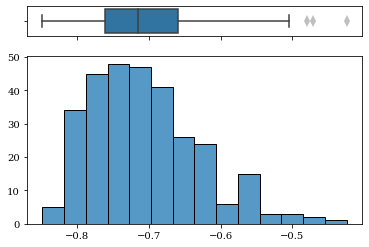

In [15]:
axes = histo_box(validation.score)

# visualize

In [16]:
def show_heatmaps(vmin=None, vmax=None):
    """Visualize spatial arrangement of validation scores."""
    axes = []
    for marker_set, heatmap in heatmaps.items():
        g = sns.heatmap(heatmaps[marker_set],
                        vmin=vmin,
                        vmax=vmax,
                        cmap='viridis',
                        cbar_kws={'label' : "Kendall's $\\tau$"})

        g.figure.axes[-1].yaxis.label.set_size(15)
        
        g.figure.axes[0].set_xlabel('longitude', size=15)
        g.figure.axes[0].set_ylabel('latitude', size=15)
        g.figure.axes[0].set_title(f'"{marker_set}" marker set', size=15)

        plt.show()

        axes.append(g.figure.axes[0])
    
    return axes

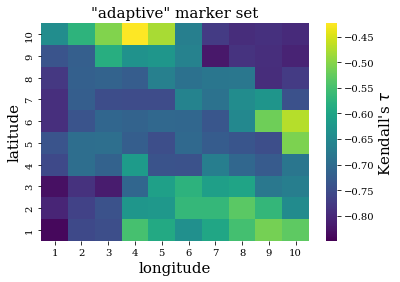

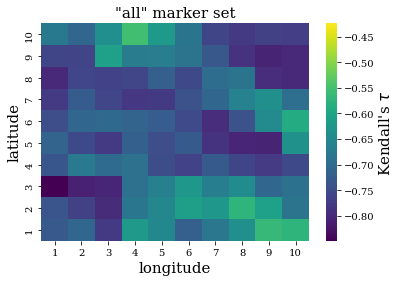

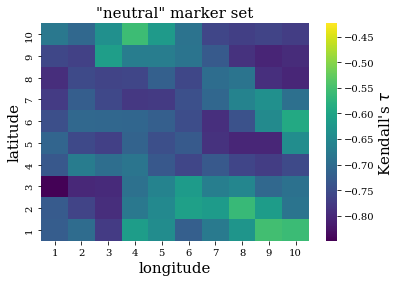

In [17]:
# heatmaps with common color bar
axes = show_heatmaps(vmin=vmin, vmax=vmax)

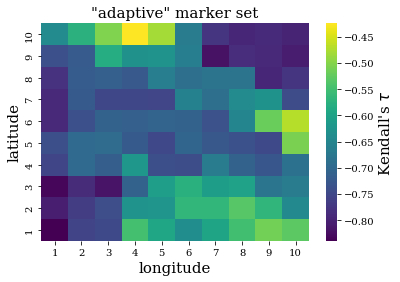

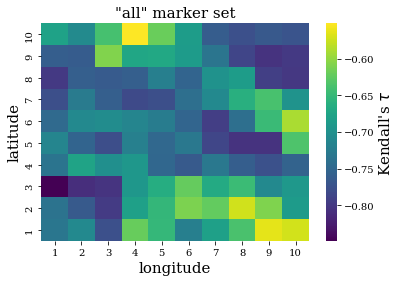

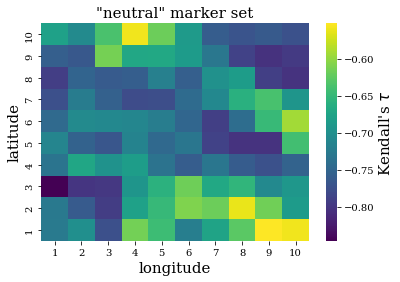

In [18]:
# heatmaps with unique color bar per heatmap
axes = show_heatmaps()

# compare to original scores

In [19]:
original_scores = pd.read_table(
    f'{original_tutorial_dir}/gradient_forests/validation/tutorial_validation_scores.txt'
)

original_scores['level'] = original_scores['ind_or_pooled'] + original_scores['marker_set'] + original_scores['garden'].astype(str)

original_scores.head()

,seed,ind_or_pooled,marker_set,garden,score,program,level
0,tutorial,pooled,adaptive,1,-0.865575,GF,pooledadaptive1
1,tutorial,pooled,adaptive,2,-0.857720,GF,pooledadaptive2
2,tutorial,pooled,adaptive,3,-0.816133,GF,pooledadaptive3
3,tutorial,pooled,adaptive,4,-0.824409,GF,pooledadaptive4
4,tutorial,pooled,adaptive,5,-0.781449,GF,pooledadaptive5


In [20]:
luni(original_scores.level), nrow(original_scores)

(300, 300)

In [21]:
# sanity check

validation_level = validation['ind_or_pooled'] + validation['marker_set'] + validation['garden'].astype(str)
original_validation_level = original_scores['ind_or_pooled'] + original_scores['marker_set'] + original_scores['garden'].astype(str)

assert luni(validation_level) == nrow(validation)
assert all(validation_level == original_validation_level)

In [22]:
?ax.scatter

Object `ax.scatter` not found.


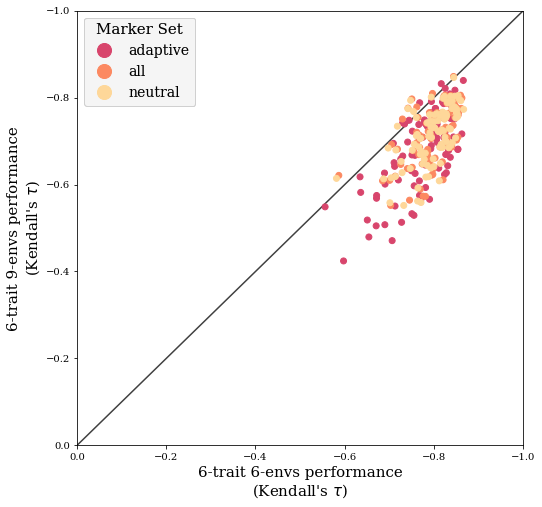

In [23]:
# compare performance between 6-trait 6-envs VS 6-trait 9-envs
fig, ax = plt.subplots(figsize=(8, 8))

scatt = ax.scatter(
    x=original_scores.score,
    y=validation.score,
    c=validation.marker_set.map(mvp.boxplot_kwargs['palette']),
    label=validation.marker_set
)

ax.set_xlim(-1, 0)
ax.set_ylim(-1, 0)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

ax.invert_xaxis()
ax.invert_yaxis()

ax.set_xlabel("6-trait 6-envs performance\n(Kendall's $\\tau$)", size=15)
ax.set_ylabel("6-trait 9-envs performance\n(Kendall's $\\tau$)", size=15)

mvp.add_legend(ax, color_by='marker_set', fontsize=14)

save_pdf


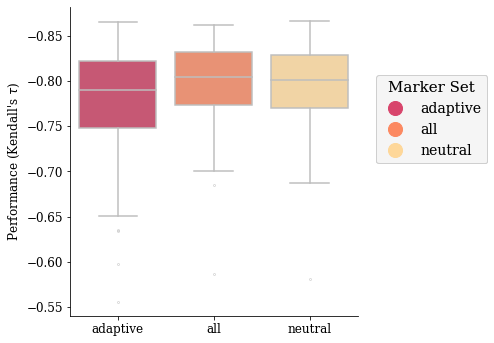

In [24]:
# confirm the seeming advantage of neutral/all markers over adaptive from fig above
    # in fig above the red dots are lowest on y-axis and kind of the x-axis too
g = sns.catplot(
    data=original_scores,
    x='marker_set',
    y='score',
    order=mvp.hue_order['marker_set'],
    kind='box',
    **mvp.boxplot_kwargs
)

g.figure.axes[0].set_xlabel(None)
g.figure.axes[0].invert_yaxis()
g.figure.axes[0].set_ylabel("Performance (Kendall's $\\tau$)", fontsize=12)
g.figure.axes[0].tick_params(axis='both', which='major', labelsize=12)

mvp.add_legend(g.figure, loc='upper right', bbox_to_anchor=(1.35, 0.8), fontsize=14)

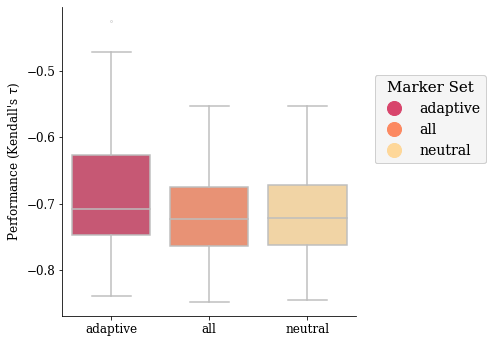

In [25]:
# confirm the seeming advantage of neutral/all markers over adaptive from fig above
    # in fig above the red dots are lowest on y-axis and kind of the x-axis too
g = sns.catplot(
    data=validation,
    x='marker_set',
    y='score',
    order=mvp.hue_order['marker_set'],
    kind='box',
    **mvp.boxplot_kwargs
)

g.figure.axes[0].invert_yaxis()

g.figure.axes[0].set_xlabel(None)
g.figure.axes[0].invert_yaxis()
g.figure.axes[0].set_ylabel("Performance (Kendall's $\\tau$)", fontsize=12)
g.figure.axes[0].tick_params(axis='both', which='major', labelsize=12)

mvp.add_legend(g.figure, loc='upper right', bbox_to_anchor=(1.35, 0.8), fontsize=14)

# save

In [26]:
validation_dir

'/home/b.lind/offsets/run_20220919_nuisance/tutorial/gradient_forests/validation'

In [27]:
f = op.join(validation_dir, 'tutorial_validation_scores.txt')

validation.to_csv(f, sep='\t', index=False, header=True)

f

'/home/b.lind/offsets/run_20220919_nuisance/tutorial/gradient_forests/validation/tutorial_validation_scores.txt'

In [28]:
formatclock(dt.now() - t0)

'0-00:00:03'